# Imports

In [ ]:
#Imports
import autograd.numpy as np
from autograd import grad
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from itertools import product
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import CLD_CONTINUED
import warnings
import numpy as np
from scipy.optimize import basinhopping
from sklearn.metrics._plot.confusion_matrix import unique_labels
from google.colab import files

from scipy.optimize import OptimizeWarning
np.seterr(over='ignore')
np.seterr(invalid='ignore')
warnings.filterwarnings("ignore", category=OptimizeWarning)

# Loading files

In [ ]:
# Define the URL where the CSV file is hosted
url = "https://raw.githubusercontent.com/Besiroglu/data/main/svg_extracted_data.csv"

# Use pandas to read the CSV file directly from the URL
training_df = pd.read_csv(url)

# The DataFrame 'training_df' now contains the data from the CSV file

training_df['Training Tokens'] = training_df['Training FLOP']/(6.0*training_df['Model Size'])
training_df = training_df[['Model Size', 'Training Tokens', 'Training FLOP', 'loss']].dropna()

In [ ]:
training_df

,Model Size,Training Tokens,Training FLOP,loss
0,6.795600e+09,2.451060e+08,9.993853e+18,5.005582
1,2.979521e+09,5.161647e+08,9.227541e+18,4.665232
2,2.638631e+09,6.160421e+08,9.753047e+18,3.765563
3,2.282804e+09,7.025502e+08,9.622708e+18,3.793872
4,2.006673e+09,8.116029e+08,9.771731e+18,3.446995
...,...,...,...,...
240,1.730547e+09,1.248775e+11,1.296639e+21,2.286446
241,2.282809e+09,1.310546e+11,1.795036e+21,2.249076
242,2.638636e+09,1.457902e+11,2.308123e+21,2.222281
243,2.979528e+09,1.466122e+11,2.621011e+21,2.212313


In [ ]:
#download the plotdigitized data (isn't necessary)
file_url = 'https://drive.google.com/uc?export=download&id=1s2RW0BLe94ViSNf-Jr4NFnB7xvggduDQ'
training_data_plotdigitized = pd.read_csv(file_url)
training_data_plotdigitized.rename(columns={'training FLOP': 'Training FLOP'}, inplace=True)
training_data_plotdigitized.rename(columns={'model size (millions)': 'Model Size'}, inplace=True)
training_data_plotdigitized['Model Size'] = training_data_plotdigitized['Model Size']*10**6
training_data_plotdigitized['Training Tokens'] = training_data_plotdigitized['Training FLOP']/(6.0*training_data_plotdigitized['Model Size'])
training_data_plotdigitized = training_data_plotdigitized[['Model Size', 'Training Tokens', 'Training FLOP', 'loss']].dropna()

In [ ]:
training_df.head(5)

,Model Size,Training Tokens,Training FLOP,loss
0,6.795600e+09,2.451060e+08,9.993853e+18,5.005582
1,2.979521e+09,5.161647e+08,9.227541e+18,4.665232
2,2.638631e+09,6.160421e+08,9.753047e+18,3.765563
3,2.282804e+09,7.025502e+08,9.622708e+18,3.793872
4,2.006673e+09,8.116029e+08,9.771731e+18,3.446995


# Plot of the data

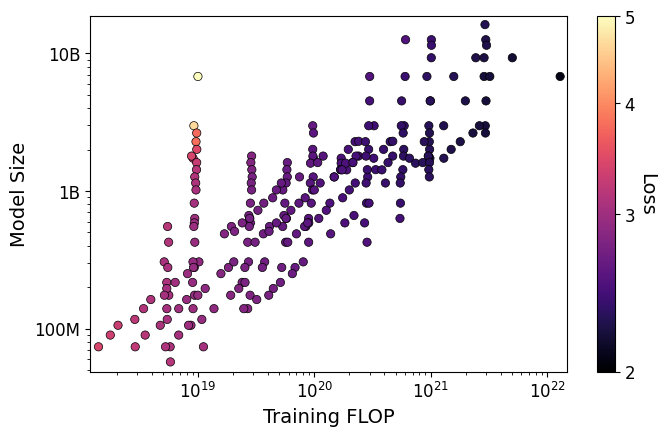

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker

# Adjusting default font sizes for better readability
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14, 'axes.titlesize': 16})

# Creating the scatter plot
plt.figure(figsize=(10/1.3, 6/1.3))
sc = plt.scatter(training_df["Training FLOP"], training_df["Model Size"],
                 c=training_df["loss"], cmap='magma', norm=LogNorm(vmin=2.0, vmax=5.0), marker='o', edgecolors='black', linewidths=0.5)

# Adding a color bar
cbar = plt.colorbar(sc)
cbar.set_label('Loss', rotation=270, labelpad=15)

# Directly setting color bar tick labels to avoid scientific notation
cbar_ticks = [2, 3, 4, 5]  # Define the ticks you want based on your data range
cbar.set_ticks(cbar_ticks)  # Set these ticks on the color bar
cbar.set_ticklabels([str(tick) for tick in cbar_ticks])  # Set the tick labels as plain strings of these ticks

# Setting the plot labels and title
plt.xlabel('Training FLOP')
plt.ylabel('Model Size')

# Applying log scale to both axes
plt.xscale('log')
plt.yscale('log')

# Custom formatter function for y-axis
def custom_formatter(x, pos):
    if x >= 1e9:
        return '{:d}B'.format(int(x/1e9))
    elif x >= 1e6:
        return '{:d}M'.format(int(x/1e6))
    elif x >= 1e3:
        return '{:d}K'.format(int(x/1e3))
    else:
        return str(int(x))

# Applying the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

# Custom formatter for axes to display ticks as 10^x
plt.gca().xaxis.set_major_formatter(ticker.LogFormatterSciNotation(base=10, labelOnlyBase=False))

# Setting axes limits
plt.xlim([min(training_df['Training FLOP'])*0.85, max(training_df['Training FLOP'])*1.15])
plt.ylim([min(training_df['Model Size'])*0.85, max(training_df['Model Size'])*1.15])

# Saving the plot to a PDF
plt.savefig('training_flop_vs_model_size.pdf')

plt.show()

In [ ]:
# Custom formatter function for y-axis
def custom_formatter(x, pos):
    if x >= 1e9:
        return '{:d}B'.format(int(x/1e9))
    elif x >= 1e6:
        return '{:d}M'.format(int(x/1e6))
    elif x >= 1e3:
        return '{:d}K'.format(int(x/1e3))
    else:
        return str(int(x))

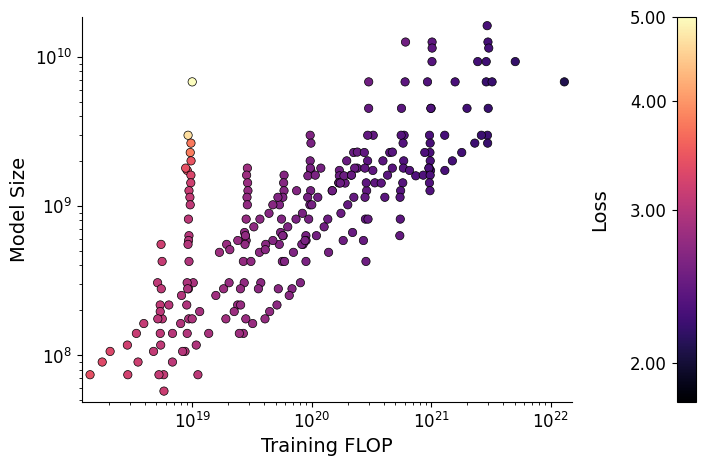

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
from matplotlib.transforms import Bbox

# Adjusting default font sizes for better readability
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14, 'axes.titlesize': 16})

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(12/1.2, 6/1.2))
sc = ax.scatter(training_df["Training FLOP"], training_df["Model Size"],
                c=training_df["loss"], cmap='magma', norm=LogNorm(vmin=1.804501, vmax=5.0), marker='o', edgecolors='black', linewidths=0.5)

# Adding a color bar on the right, but with ticks and text to the left of the bar
cbar = fig.colorbar(sc, ax=ax, location='right', pad=0.15)
cbar.set_label('Loss', rotation=90, labelpad=15)
cbar.ax.yaxis.set_ticks_position('left')
cbar.ax.yaxis.set_label_position('left')

# Adjusting subplot parameters to remove whitespace
fig.subplots_adjust(left=0.1, right=0.8)  # Adjust the right margin here

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Directly setting color bar tick labels to avoid scientific notation
cbar_ticks = [2.00, 3.00, 4.00, 5.00]
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar_ticks])

# Setting the plot labels and title
ax.set_xlabel('Training FLOP')
ax.set_ylabel('Model Size')

# Applying log scale to both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Custom formatter for axes
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation(base=10, labelOnlyBase=False))

# Setting axes limits
ax.set_xlim([min(training_df['Training FLOP'])*0.85, max(training_df['Training FLOP'])*1.15])
ax.set_ylim([min(training_df['Model Size'])*0.85, max(training_df['Model Size'])*1.15])

# Saving the plot to a PDF
# Get the current bounding box of the figure
fig_bbox = fig.get_tightbbox(fig.canvas.get_renderer())

# Create a new bounding box by modifying the original
# Increase left and right margins by specifying a shift
padding = 0.85 # Change the padding value as needed (in inches)
new_fig_bbox = Bbox.from_extents(
    fig_bbox.x0 - padding,  # Extend left by padding inches
    fig_bbox.y0,            # Keep bottom the same
    fig_bbox.x1 + padding+0.25,  # Extend right by padding inches
    fig_bbox.y1             # Keep top the same
)

# Save the figure using the new bounding box
plt.savefig('training_flop_vs_model_size.pdf', bbox_inches=new_fig_bbox)

plt.show()

In [ ]:
# outlier datapoints
training_df['d_n_ratio'] = training_df['Training Tokens']/training_df['Model Size']

In [ ]:
training_df

,Model Size,Training Tokens,Training FLOP,loss,d_n_ratio
0,6.795600e+09,2.451060e+08,9.993853e+18,5.005582,0.036068
1,2.979521e+09,5.161647e+08,9.227541e+18,4.665232,0.173237
2,2.638631e+09,6.160421e+08,9.753047e+18,3.765563,0.233470
3,2.282804e+09,7.025502e+08,9.622708e+18,3.793872,0.307758
4,2.006673e+09,8.116029e+08,9.771731e+18,3.446995,0.404452
...,...,...,...,...,...
240,1.730547e+09,1.248775e+11,1.296639e+21,2.286446,72.160720
241,2.282809e+09,1.310546e+11,1.795036e+21,2.249076,57.409362
242,2.638636e+09,1.457902e+11,2.308123e+21,2.222281,55.252085
243,2.979528e+09,1.466122e+11,2.621011e+21,2.212313,49.206528


# Replicate methodology from Chinchilla paper



Define things

In [ ]:
nr_of_models_excluded = 5

In [ ]:
N = training_df['Model Size'].values
D = training_df['Training Tokens'].values
losses = training_df['loss'].values
bootstraps = 4000

sorted_losses = sorted(losses)
if nr_of_models_excluded == 0:
    indices = list(range(len(N)))
else:
    sorted_losses = sorted(losses)
    indices = [i for i in range(len(N)) if losses[i] < sorted_losses[-nr_of_models_excluded]]

np.random.seed(42)
random_indices = [np.random.choice(indices, size=len(indices), replace=True) for _ in range(bootstraps)]

In [ ]:
import autograd.numpy as np
from autograd.scipy.stats import norm
from scipy.optimize import minimize
from scipy.special import erf

true_params = np.array([np.log(406.4), np.log(410.7), np.log(1.69), 0.34, 0.28])

# Define the log-sum-exp function
def log_sum_exp(a, b, e, alpha, beta, N, D):
    return np.log(np.exp(a - alpha * np.log(N)) + np.exp(b - beta * np.log(D)) + np.exp(e))

# Define the Huber loss function
def custom_huber_loss(y_true, y_pred, delta=1e-3):
    # Calculate the difference
    diff = y_true - y_pred
    # Calculate the condition for Huber loss
    cond = np.abs(diff) <= delta
    # Apply Huber loss formula
    loss = np.where(cond, 0.5 * diff**2, delta * (np.abs(diff) - 0.5 * delta))
    return np.sum(loss)

def huber_normalizing_factor(delta=1e-3):
    return np.sqrt(2*np.pi) * (1 - 2*norm.sf(delta)) + 2 * np.exp(-0.5*delta**2)/delta

def huber_logpdf(x, delta=1e-3, loc=0, scale=1):
    x = (x-loc)/scale

    cond = np.abs(x) <= delta
    loss = np.where(cond, 0.5 * x**2, delta * (np.abs(x) - 0.5 * delta))
    return -loss - np.log(huber_normalizing_factor(delta=delta)) - np.log(scale)

def huber_pdf(x, delta=1e-3, loc=0, scale=1):
    return np.exp(huber_logpdf(x, delta=delta, loc=loc, scale=scale))

# Define the objective function to be minimized
def objective(params, N, D, losses):
    a, b, e, alpha, beta, sigma = params
    predictions = log_sum_exp(a, b, e, alpha, beta, N, D)
    return -np.sum(huber_logpdf(np.log(losses), loc=predictions, scale=np.exp(sigma), delta=1e-3))
    # return custom_huber_loss(np.log(losses), predictions, delta=1e-3)

def scale_objective(sigma, params, N, D, losses):
    a, b, e, alpha, beta = params
    predictions = log_sum_exp(a, b, e, alpha, beta, N, D)
    return -np.sum(huber_logpdf(np.log(losses), loc=predictions, scale=np.exp(sigma), delta=1e-3))
    # return custom_huber_loss(np.log(losses), predictions, delta=1e-3)

def constant_term_objective(params, a, b, alpha, beta, N, D, losses):
    e, sigma = params
    predictions = log_sum_exp(a, b, e, alpha, beta, N, D)
    return -np.sum(huber_logpdf(np.log(losses), loc=predictions, scale=np.exp(sigma), delta=1e-3))

def huber_loss_objective(params, N, D, losses):
    a, b, e, alpha, beta = params
    predictions = log_sum_exp(a, b, e, alpha, beta, N, D)
    return custom_huber_loss(np.log(losses), predictions, delta=1e-3)

# Define the parameter untransform
def untransform_params(param_array):
    if len(np.shape(param_array)) == 2:
      return np.hstack((np.exp(param_array[:, :3]), param_array[:, 3:]))
    else:
      return np.hstack((np.exp(param_array[:3]), param_array[3:]))

# Define the Huber loss function on residuals
def huber_loss(residuals, delta=1e-3):
    # Calculate the difference
    diff = residuals
    # Calculate the condition for Huber loss
    cond = np.abs(diff) <= delta
    # Apply Huber loss formula
    loss = np.where(cond, 0.5 * diff**2, delta * (np.abs(diff) - 0.5 * delta))
    return loss

### Replicate exactly

In [ ]:
import autograd.numpy as np
from scipy.optimize import minimize

N = training_df['Model Size'].values
D = training_df['Training Tokens'].values
losses = training_df['loss'].values

# Set up the grid for initial parameter values
alpha_vals = np.arange(0, 2.5, 0.5)
beta_vals = np.arange(0, 2.5, 0.5)
e_vals = np.arange(-1, 1.5, 0.5)
a_vals = np.arange(0, 30, 5)
b_vals = np.arange(0, 30, 5)

# Perform the optimization using L-BFGS over the grid of initial values
best_loss = np.inf
best_params = None

from itertools import product
results_dict = {}
for alpha, beta, e, a, b in product(alpha_vals, beta_vals, e_vals, a_vals, b_vals):
    init_params = [a, b, e, alpha, beta]
    result = minimize(huber_loss_objective, init_params, args=(N[indices], D[indices], losses[indices]), method='L-BFGS-B')
    results_dict[tuple(init_params)] = {'params': result.x, 'loss': result.fun}
    if result.success and result.fun < best_loss:
        best_loss = result.fun
        best_params = result.x
        print(f"New best loss: {best_loss}")
        print(f"Best params: {best_params}")
        print(f"Initial guess: {init_params}")

# Transform the fitted parameters a, b, e to A, B, E
if best_params is not None:
    A = np.exp(best_params[0])
    B = np.exp(best_params[1])
    E = np.exp(best_params[2])
    alpha = best_params[3]
    beta = best_params[4]
    print(f"Best fit parameters: A={A}, B={B}, E={E}, alpha={alpha}, beta={beta}")
else:
    print("Optimization failed to converge.")

New best loss: 0.001107584536675308
Best params: [6.75609281 6.55688188 0.57962309 0.38162023 0.312145  ]
Initial guess: [0, 0, -1.0, 0.0, 0.0]
New best loss: 0.0010182742570000536
Best params: [6.16787785 7.66951248 0.59722263 0.34722876 0.36714095]
Initial guess: [0, 20, -1.0, 0.0, 0.0]
New best loss: 0.0010182740965639055
Best params: [6.16843612 7.66976698 0.59726317 0.34726317 0.36715337]
Initial guess: [20, 10, -1.0, 0.0, 0.0]
New best loss: 0.0010182740887990337
Best params: [6.16883793 7.66938048 0.59726582 0.34728695 0.36713389]
Initial guess: [0, 20, 0.0, 0.0, 0.0]
New best loss: 0.001018274066684003
Best params: [6.1687596  7.6697236  0.59727696 0.34728237 0.36715151]
Initial guess: [15, 0, 0.0, 0.0, 0.0]
New best loss: 0.0010182740474203762
Best params: [6.16931406 7.67010234 0.59730045 0.34731363 0.36716919]
Initial guess: [20, 5, 0.5, 0.0, 0.0]
New best loss: 0.0010182740412700074
Best params: [6.1691049  7.67035062 0.59730447 0.34730094 0.36718273]
Initial guess: [10, 10

# Chinchilla parametric fit fits the data poorly

### Our estimates

In [ ]:
import autograd.numpy as np

# Set up the grid for initial parameter values
param_list = []

for num, indices in enumerate(random_indices):
  # Perform the optimization using BFGS
  best_loss = np.inf
  best_params = None

  init_params = list(true_params)
  result = minimize(huber_loss_objective, init_params, args=(N[indices], D[indices], losses[indices]), \
                    jac=grad(huber_loss_objective), method='BFGS')

  best_loss = result.fun
  best_params = result.x
  #print(f"New best loss: {best_loss}")
  #print(f"Best params: {best_params}")

  if num % 100 == 99:
    print("Bootstrap step %d completed" % (num+1))

  param_list.append(result.x)

param_list = np.array(param_list)
cov_matrix = np.cov(np.transpose(param_list))

Bootstrap step 100 completed
Bootstrap step 200 completed
Bootstrap step 300 completed
Bootstrap step 400 completed
Bootstrap step 500 completed
Bootstrap step 600 completed
Bootstrap step 700 completed
Bootstrap step 800 completed
Bootstrap step 900 completed
Bootstrap step 1000 completed
Bootstrap step 1100 completed
Bootstrap step 1200 completed
Bootstrap step 1300 completed
Bootstrap step 1400 completed
Bootstrap step 1500 completed
Bootstrap step 1600 completed
Bootstrap step 1700 completed
Bootstrap step 1800 completed
Bootstrap step 1900 completed
Bootstrap step 2000 completed
Bootstrap step 2100 completed
Bootstrap step 2200 completed
Bootstrap step 2300 completed
Bootstrap step 2400 completed
Bootstrap step 2500 completed
Bootstrap step 2600 completed
Bootstrap step 2700 completed
Bootstrap step 2800 completed
Bootstrap step 2900 completed
Bootstrap step 3000 completed
Bootstrap step 3100 completed
Bootstrap step 3200 completed
Bootstrap step 3300 completed
Bootstrap step 3400

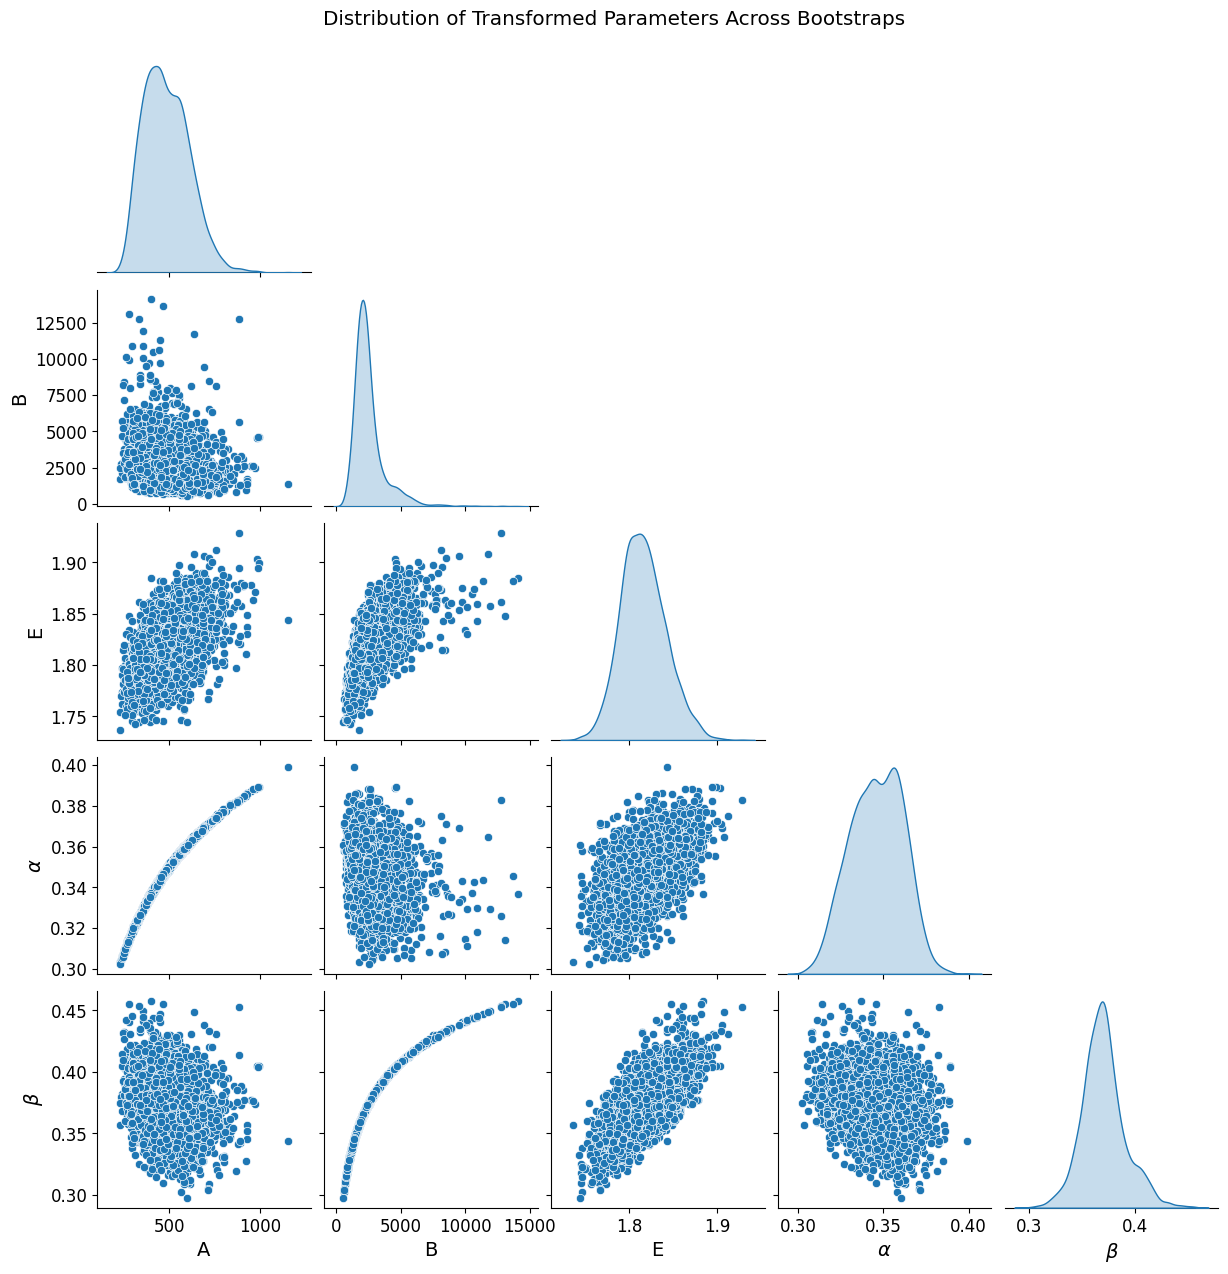

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Applying the given transformations
transformed_params = np.exp(param_list[:, :3])  # Apply exp() to the first three parameters
alpha_beta = param_list[:, 3:]  # The last two parameters remain unchanged
transformed_params = np.hstack([transformed_params, alpha_beta])  # Combine the transformed and untransformed parameters

# Creating a DataFrame for the transformed parameters
transformed_params_df = pd.DataFrame(
    transformed_params,
    columns=['A', 'B', 'E', r'$\alpha$', r'$\beta$']
)

# Plotting the distribution of each transformed parameter across bootstraps
sns.pairplot(transformed_params_df, diag_kind='kde', corner=True)
plt.suptitle('Distribution of Transformed Parameters Across Bootstraps', y=1.02)
plt.show()

In [ ]:
param_list = np.array(param_list)
cov_matrix = np.cov(np.transpose(param_list))

param_list_untransformed = untransform_params(param_list)
cov_matrix_untransformed = np.cov(np.transpose(param_list_untransformed))

In [ ]:
import autograd.numpy as np

init_params = list(true_params) + [0]

indices = list(range(len(N))) if nr_of_models_excluded == 0 else [i for i in range(len(N)) if losses[i] < sorted(losses)[-nr_of_models_excluded]]

result = minimize(objective, init_params, args=(N[indices], D[indices], losses[indices]), method='BFGS',
                  jac=grad(objective))

print(result)
print(result.x)

estimated_params = result.x[:5]
estimated_params_untransformed = untransform_params(estimated_params)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -879.7731390602353
        x: [ 6.178e+00  7.643e+00  5.971e-01  3.478e-01  3.659e-01
            -1.227e+01]
      nit: 59
      jac: [ 8.048e-07  1.205e-05  2.144e-05 -3.130e-05 -2.523e-04
             1.112e-10]
 hess_inv: [[ 6.995e-07 -4.332e-07 ... -2.255e-08  3.123e-07]
            [-4.332e-07  2.325e-06 ...  1.155e-07 -2.895e-07]
            ...
            [-2.255e-08  1.155e-07 ...  5.743e-09 -1.477e-08]
            [ 3.123e-07 -2.895e-07 ... -1.477e-08  4.150e-03]]
     nfev: 218
     njev: 205
[  6.17795598   7.64273236   0.59711196   0.34781303   0.36585412
 -12.26662388]


In [ ]:
standard_errors = np.sqrt(np.diag(cov_matrix[:5, :5]))
standard_errors_untransformed = np.sqrt(np.diag(cov_matrix_untransformed[:5, :5]))

parameter_labels = ["A", "B", "E", "alpha", "beta"]
print("Parameter estimates and their standard errors\n")
for index, label in enumerate(parameter_labels):
  print("%s: %.2f (%.2f)" % (label, estimated_params_untransformed[index], standard_errors_untransformed[index]))

Parameter estimates and their standard errors

A: 482.01 (124.58)
B: 2085.43 (1293.23)
E: 1.82 (0.03)
alpha: 0.35 (0.02)
beta: 0.37 (0.02)


In [ ]:
# Calculating 95% Confidence Intervals for each parameter
confidence_intervals = {}

# For each column in the DataFrame, calculate the 2.5th and 97.5th percentiles
for column in transformed_params_df.columns:
    lower_bound = np.percentile(transformed_params_df[column], 2.5)
    upper_bound = np.percentile(transformed_params_df[column], 97.5)
    confidence_intervals[column] = (lower_bound, upper_bound)

# Printing out the 95% Confidence Intervals for each parameter
print("95% Confidence Intervals for Parameter Estimates\n")
for parameter, (lower, upper) in confidence_intervals.items():
    print(f"{parameter}: ({lower:.3f}, {upper:.3f})")

95% Confidence Intervals for Parameter Estimates

A: (285.211, 743.614)
B: (1035.686, 5810.248)
E: (1.769, 1.871)
$\alpha$: (0.317, 0.373)
$\beta$: (0.331, 0.415)


In [ ]:
true_params_unlogged = np.array([406.4, 410.7, 1.69, 0.34, 0.28])
true_params_unlogged

array([4.064e+02, 4.107e+02, 1.690e+00, 3.400e-01, 2.800e-01])

In [ ]:
from scipy.stats import t
import numpy as np

# Calculate t-statistics
t_statistics = (estimated_params_untransformed - true_params_unlogged) / standard_errors_untransformed

# Degrees of freedom, assuming large sample size we approximate to infinity for the t-distribution
degrees_of_freedom = len(indices)-5

# Calculate two-tailed p-values
p_values = t.sf(np.abs(t_statistics), degrees_of_freedom) * 2  # times 2 for two-tailed test

# Print parameter names alongside p-values
for label, p_value in zip(parameter_labels, p_values):
    print(f"{label}: P-value = {p_value:.1e}")

A: P-value = 5.4e-01
B: P-value = 2.0e-01
E: P-value = 1.5e-06
alpha: P-value = 6.1e-01
beta: P-value = 4.3e-05


### Chi squared test

Chi squared for equality of all parameters

In [ ]:
from scipy.stats import chi2
import numpy as np

def chi_squared_stat(params_1, params_2, cov_matrix):
  return np.transpose(params_1 - params_2) @ np.linalg.inv(cov_matrix) @ (params_1 - params_2)

print("Difference between Hoffmann et al. (2022) params and our params:", true_params - estimated_params)
chi_squared = chi_squared_stat(true_params, estimated_params, cov_matrix[:5, :5])

print("Implied chi^2 (df=5) test statistic: %.2f" % (chi_squared))
print("Implied chi^2 (df=5) p-value: %.2e" % (chi2.sf(chi_squared, df=5)))

Difference between Hoffmann et al. (2022) params and our params: [-0.17061808 -1.62486934 -0.07238343 -0.00781303 -0.08585412]
Implied chi^2 (df=5) test statistic: 294.00
Implied chi^2 (df=5) p-value: 1.95e-61


# Our fit is so much better

## Plots

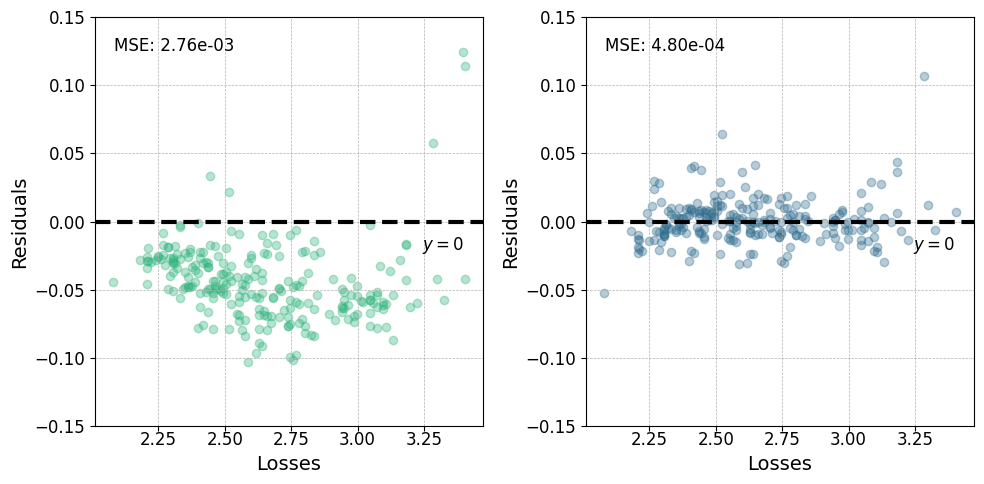

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your residuals calculation
residuals = losses[indices] - (1.69 + 406.4 / N[indices]**0.34 + 410.7 / D[indices]**0.28)  # Hoffmann estimates
mse = np.mean(residuals**2)  # Compute MSE instead of RSS

residuals_ours = losses[indices] - np.exp(log_sum_exp(*estimated_params, N[indices], D[indices]))
mse_ours = np.mean(residuals_ours**2)  # Compute MSE instead of RSS

color_ours = 0.35
color_chinchilla = 0.65

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Combined figure

# Hoffmann fit plot
axs[0].scatter(losses[indices], residuals, alpha=0.35, color=plt.cm.viridis(color_chinchilla))  # Adjust color as needed
axs[0].set_xlabel('Losses')
axs[0].set_ylabel('Residuals')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].tick_params(axis='x', which='major', pad=0.1)
axs[0].text(0.05, 0.95, f'MSE: {mse:.2e}', transform=axs[0].transAxes, verticalalignment='top')  # Display MSE
axs[0].axhline(0, color='black', linestyle='--', linewidth=3)
axs[0].text(axs[0].get_xlim()[1]*0.98, -0.025, r'$y=0$', verticalalignment='bottom', horizontalalignment='right', color='black')
axs[0].set_ylim(-0.15, 0.15)  # Set y-range

# Our fit plot
axs[1].scatter(losses[indices], residuals_ours, alpha=0.35, color=plt.cm.viridis(color_ours))  # Adjust color as needed
axs[1].set_xlabel('Losses')
axs[1].set_ylabel('Residuals')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].tick_params(axis='x', which='major', pad=0.1)
axs[1].text(0.05, 0.95, f'MSE: {mse_ours:.2e}', transform=axs[1].transAxes, verticalalignment='top')  # Display MSE
axs[1].axhline(0, color='black', linestyle='--', linewidth=3)
axs[1].text(axs[1].get_xlim()[1]*0.98, -0.025, r'$y=0$', verticalalignment='bottom', horizontalalignment='right', color='black')
axs[1].set_ylim(-0.15, 0.15)  # Set y-range

plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
len(indices)

240

In [ ]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(residuals, residuals_ours, equal_var=True)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: -20.398021769412715, P-value: 5.388405312056461e-67


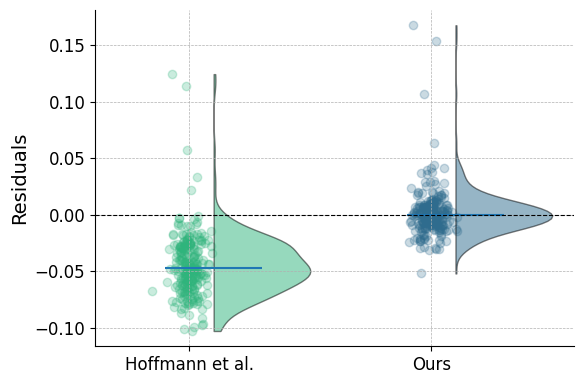

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

# Assuming residuals_2 and residuals_2_ours are numpy arrays with your data
# Define the data

color_ours = 0.35
color_chinchilla = 0.65

data_control = residuals  # replace with your actual data for population-matched controls
data_active = residuals_ours  # replace with your actual data for musically active cases

# Create a new figure
fig, ax = plt.subplots(figsize=(6, 4))

# Check for the largest residual and set the y-limit if necessary
largest_residual = max(np.max(data_control), np.max(data_active))
if largest_residual > 0.6:
    ax.set_ylim(-0.15, 0.2)

# Scatter plots with a small random noise to x-values for jitter effect
scatter_control = np.random.normal(1, 0.04, size=len(data_control))
scatter_active = np.random.normal(2, 0.04, size=len(data_active))
ax.scatter(scatter_control, data_control, alpha=0.25, color=plt.cm.viridis(color_chinchilla))
ax.scatter(scatter_active, data_active, alpha=0.25, color=plt.cm.viridis(color_ours))

# Offset for the violin plots to be right of the scatter points
violin_offset = 0.1  # Adjust as needed

# Create violin plots on the same axis as scatter plots, slightly offset to the right
violin_parts = ax.violinplot([data_control, data_active], positions=[1 + violin_offset, 2 + violin_offset],
                             widths=0.8, showmeans=False, showextrema=False, showmedians=True)

# Make the violin plot one-sided by adjusting its paths
colors = [plt.cm.viridis(color_chinchilla), plt.cm.viridis(color_ours)]  # Use the same colors as scatter plots
for pc, color in zip(violin_parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)
    m = np.mean(pc.get_paths()[0].vertices[:, 0])  # Find the center of the violin
    pc.get_paths()[0].vertices[:, 0] = np.clip(pc.get_paths()[0].vertices[:, 0], m, np.inf)  # Clip to the right

# Calculate means and confidence intervals for both groups
mean_control = np.mean(data_control)
mean_active = np.mean(data_active)
ci_control = np.std(data_control) * 1.96 / np.sqrt(len(data_control))
ci_active = np.std(data_active) * 1.96 / np.sqrt(len(data_active))

# Set the x-tick labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Hoffmann et al.', 'Ours'])

# Set y-label
ax.set_ylabel('Residuals')

# Add grid to the plot
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a horizontal line at y=0
ax.axhline(y=0, color='black',  linestyle='--', linewidth=0.8)

# Set layout to be tight
plt.tight_layout()

plt.savefig("distributions.pdf")
#plt.savefig("distributions2.pdf")

# Show plot
plt.show()

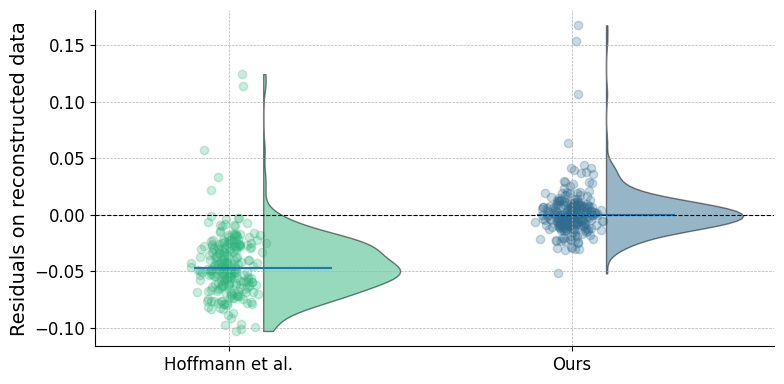

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

# Assuming residuals_2 and residuals_2_ours are numpy arrays with your data
# Define the data

color_ours = 0.35
color_chinchilla = 0.65

data_control = residuals  # replace with your actual data for population-matched controls
data_active = residuals_ours  # replace with your actual data for musically active cases

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 4))

# Check for the largest residual and set the y-limit if necessary
largest_residual = max(np.max(data_control), np.max(data_active))
if largest_residual > 0.6:
    ax.set_ylim(-0.15, 0.2)

# Scatter plots with a small random noise to x-values for jitter effect
scatter_control = np.random.normal(1, 0.04, size=len(data_control))
scatter_active = np.random.normal(2, 0.04, size=len(data_active))
ax.scatter(scatter_control, data_control, alpha=0.25, color=plt.cm.viridis(color_chinchilla))
ax.scatter(scatter_active, data_active, alpha=0.25, color=plt.cm.viridis(color_ours))

# Offset for the violin plots to be right of the scatter points
violin_offset = 0.1  # Adjust as needed

# Create violin plots on the same axis as scatter plots, slightly offset to the right
violin_parts = ax.violinplot([data_control, data_active], positions=[1 + violin_offset, 2 + violin_offset],
                             widths=0.8, showmeans=False, showextrema=False, showmedians=True)

# Make the violin plot one-sided by adjusting its paths
colors = [plt.cm.viridis(color_chinchilla), plt.cm.viridis(color_ours)]  # Use the same colors as scatter plots
for pc, color in zip(violin_parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)
    m = np.mean(pc.get_paths()[0].vertices[:, 0])  # Find the center of the violin
    pc.get_paths()[0].vertices[:, 0] = np.clip(pc.get_paths()[0].vertices[:, 0], m, np.inf)  # Clip to the right

# Calculate means and confidence intervals for both groups
mean_control = np.mean(data_control)
mean_active = np.mean(data_active)
ci_control = np.std(data_control) * 1.96 / np.sqrt(len(data_control))
ci_active = np.std(data_active) * 1.96 / np.sqrt(len(data_active))

# Set the x-tick labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Hoffmann et al.', 'Ours'])

# Set y-label
ax.set_ylabel('Residuals on reconstructed data')

# Add grid to the plot
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a horizontal line at y=0
ax.axhline(y=0, color='black',  linestyle='--', linewidth=0.8)

# Adjust layout
plt.tight_layout()

plt.savefig("distributions.png")
#plt.savefig("distributions2.pdf")

# Show plot
plt.show()

Kolmogorov-Smirnov test
p-value: 4.8e-67


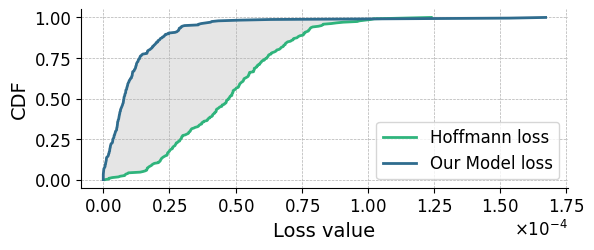

In [ ]:
from scipy.stats import ks_2samp
from matplotlib.ticker import ScalarFormatter

loss_values_chinchilla = huber_loss(residuals)
loss_values_ours = huber_loss(residuals_ours)
# Perform the Kolmogorov-Smirnov test between the two datasets
ks_statistic, p_value = ks_2samp(loss_values_chinchilla, loss_values_ours)

# Create a new figure
fig, ax = plt.subplots(figsize=(6, 4/1.5))

# Calculate and plot CDF for the first dataset
sorted_loss_values_chinchilla = np.sort(loss_values_chinchilla)
yvals = np.linspace(0, 1, len(sorted_loss_values_chinchilla))
plt.plot(sorted_loss_values_chinchilla, yvals, color=plt.cm.viridis(color_chinchilla), label='Hoffmann loss', linestyle='-', linewidth=2)

# Calculate and plot CDF for the second dataset
sorted_loss_values_ours = np.sort(loss_values_ours)
yvals_ours = np.linspace(0, 1, len(sorted_loss_values_ours))
plt.plot(sorted_loss_values_ours, yvals_ours, color=plt.cm.viridis(color_ours), label='Our Model loss', linestyle='-', linewidth=2)

# Shade the area between the CDFs for visual comparison
x_min = min(np.min(sorted_loss_values_chinchilla), np.min(sorted_loss_values_ours))
x_max = max(np.max(sorted_loss_values_chinchilla), np.max(sorted_loss_values_ours))

common_x = np.linspace(x_min, x_max, 1000)  # Increase the number of points to 1000

interp_yvals = np.interp(common_x, sorted_loss_values_chinchilla, yvals)
interp_yvals_ours = np.interp(common_x, sorted_loss_values_ours, yvals_ours)

plt.fill_between(common_x, interp_yvals, interp_yvals_ours, where=interp_yvals>=interp_yvals_ours, color='grey', alpha=0.2, interpolate=True)
plt.fill_between(common_x, interp_yvals, interp_yvals_ours, where=interp_yvals<=interp_yvals_ours, color='grey', alpha=0.2, interpolate=True)

# Labeling the plot
plt.xlabel('Loss value')
plt.ylabel('CDF')
plt.title('')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best')

# Add grid to the plot
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Add scientific notation to x-axis
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Check for the largest residual and set the y-limit if necessary
largest_residual = max(np.max(residuals), np.max(residuals_ours))
if largest_residual > 0.6:
    ax.set_xlim(0, 0.0002)  # Corrected to use ax object

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Annotating the plot with the Kolmogorov-Smirnov test's p-value
# bbox_props = dict(boxstyle="round", fc="white", ec="0.5", alpha=0.8)
# plt.text(0.4, 0.55, f"Kolmogorov-Smirnov test\np-value: {p_value:.1e}",
#         horizontalalignment='left',
#         verticalalignment='center',
#         transform=plt.gca().transAxes,
#         fontsize=12,
#         bbox=bbox_props)

print(f"Kolmogorov-Smirnov test\np-value: {p_value:.1e}")

plt.tight_layout()
plt.savefig("cdfs.pdf")

plt.show()

In [ ]:
# Your residuals calculation
loss_values_chinchilla = huber_loss(losses[indices] - (1.69 + 406.4 / N[indices]**0.34 + 410.7 / D[indices]**0.28))  # Hoffmann estimates
loss_values_ours = huber_loss(losses[indices] - np.exp(log_sum_exp(*estimated_params, N[indices], D[indices])))


# Calculate the fraction of indices for which loss_values_chinchilla < loss_values_ours
fraction = np.mean(loss_values_chinchilla < loss_values_ours)
fraction

0.10416666666666667

In [ ]:
np.percentile(loss_values_ours, 98)

4.52412856864656e-05

In [ ]:
np.mean(loss_values_chinchilla)/np.mean(loss_values_ours)

3.896985262357712

Mann-Whitney U test:
Statistic: 53449.0
P-value: 3.5404271270884533e-59


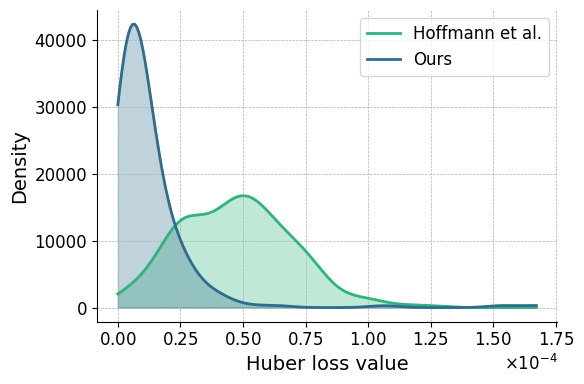

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.ticker import ScalarFormatter

# Assuming residuals_2 and residuals_2_ours are numpy arrays with your data
# Define the data
color_ours = 0.35
color_chinchilla = 0.65
data_control = huber_loss(residuals)  # replace with your actual data for population-matched controls
data_active = huber_loss(residuals_ours) # replace with your actual data for musically active cases

from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(data_control, data_active)

# Print the results
print(f"Mann-Whitney U test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Create a new figure
fig, ax = plt.subplots(figsize=(6, 4))

# Calculate the KDE for each dataset
kde_control = gaussian_kde(data_control)
kde_active = gaussian_kde(data_active)

# Define the range for the KDE plot
x_min = min(data_control.min(), data_active.min())
x_max = max(data_control.max(), data_active.max())
x_range = np.linspace(x_min, x_max, 200)

# Plot the KDE curves
ax.plot(x_range, kde_control(x_range), color=plt.cm.viridis(color_chinchilla), linewidth=2, label='Hoffmann et al.')
ax.plot(x_range, kde_active(x_range), color=plt.cm.viridis(color_ours), linewidth=2, label='Ours')

# Fill the area under the KDE curves
ax.fill_between(x_range, kde_control(x_range), alpha=0.3, color=plt.cm.viridis(color_chinchilla))
ax.fill_between(x_range, kde_active(x_range), alpha=0.3, color=plt.cm.viridis(color_ours))

# Set y-label
ax.set_ylabel('Density')
ax.set_xlabel('Huber loss value')

# Add grid to the plot
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add scientific notation to x-axis
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Add a legend
ax.legend(loc='upper right')

# Set layout to be tight
plt.tight_layout()

# Save the plot
plt.savefig("distributions_kde.pdf")

# Show plot
plt.show()

In [ ]:
-np.mean(residuals)

0.04469521211887148

Kolmogorov-Smirnov test
p-value: 6.6e-12


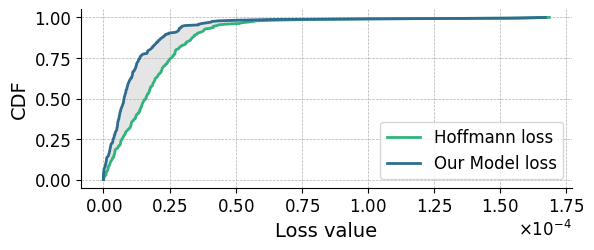

In [ ]:
from scipy.stats import ks_2samp

loss_values_chinchilla_2 = huber_loss(residuals-np.mean(residuals))  # replace with your actual data for population-matched controls
loss_values_ours_2 = huber_loss(residuals_ours) # replace with your actual data for musically active cases

# Perform the Kolmogorov-Smirnov test between the two datasets
ks_statistic, p_value = ks_2samp(loss_values_chinchilla_2, loss_values_ours_2)

# Create a new figure
fig, ax = plt.subplots(figsize=(6, 4/1.5))

# Calculate and plot CDF for the first dataset
sorted_loss_values_chinchilla_2 = np.sort(loss_values_chinchilla_2)
yvals = np.linspace(0, 1, len(sorted_loss_values_chinchilla_2))
plt.plot(sorted_loss_values_chinchilla_2, yvals, color=plt.cm.viridis(color_chinchilla), label='Hoffmann loss', linestyle='-', linewidth=2)

# Calculate and plot CDF for the second dataset
sorted_loss_values_ours_2 = np.sort(loss_values_ours_2)
yvals_ours = np.linspace(0, 1, len(sorted_loss_values_ours_2))
plt.plot(sorted_loss_values_ours_2, yvals_ours, color=plt.cm.viridis(color_ours), label='Our Model loss', linestyle='-', linewidth=2)

# Shade the area between the CDFs for visual comparison
x_min = min(np.min(sorted_loss_values_chinchilla_2), np.min(sorted_loss_values_ours_2))
x_max = max(np.max(sorted_loss_values_chinchilla_2), np.max(sorted_loss_values_ours_2))
common_x = np.linspace(x_min, x_max, 1000)  # Increase the number of points to 1000

interp_yvals = np.interp(common_x, sorted_loss_values_chinchilla_2, yvals)
interp_yvals_ours = np.interp(common_x, sorted_loss_values_ours_2, yvals_ours)

plt.fill_between(common_x, interp_yvals, interp_yvals_ours, where=interp_yvals>=interp_yvals_ours, color='grey', alpha=0.2, interpolate=True)
plt.fill_between(common_x, interp_yvals, interp_yvals_ours, where=interp_yvals<=interp_yvals_ours, color='grey', alpha=0.2, interpolate=True)

# Labeling the plot
plt.xlabel('Loss value')
plt.ylabel('CDF')
plt.title('')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best')

# Add grid to the plot
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Add scientific notation to x-axis
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Annotating the plot with the Kolmogorov-Smirnov test's p-value
# bbox_props = dict(boxstyle="round", fc="white", ec="0.5", alpha=0.8)
# plt.text(0.4, 0.55, f"Kolmogorov-Smirnov test\np-value: {p_value:.1e}",
#         horizontalalignment='left',
#         verticalalignment='center',
#         transform=plt.gca().transAxes,
#         fontsize=12,
#         bbox=bbox_props)

print(f"Kolmogorov-Smirnov test\np-value: {p_value:.1e}")

plt.tight_layout()
plt.savefig("cdfs2.pdf")

plt.show()

In [ ]:
# Your residuals calculation
loss_values_chinchilla_2 = huber_loss(losses[indices] - (1.69 + 406.4 / N[indices]**0.34 + 410.7 / D[indices]**0.28)-np.mean(residuals))  # Hoffmann estimates
loss_values_ours = huber_loss(losses[indices] - np.exp(log_sum_exp(*estimated_params, N[indices], D[indices])))


# Calculate the fraction of indices for which loss_values_chinchilla_2 < loss_values_ours
fraction = np.mean(loss_values_chinchilla_2 < loss_values_ours)
fraction

0.2875

In [ ]:
np.mean(loss_values_chinchilla_2)/np.mean(loss_values_ours)

1.5843901605254433

## Tests

## Likelihood test

In [ ]:
# Define the objective function to be minimized
def objective(params, N, D, losses):
    a, b, e, alpha, beta, sigma = params
    predictions = log_sum_exp(a, b, e, alpha, beta, N, D)
    return -np.sum(huber_logpdf(np.log(losses), loc=predictions, scale=np.exp(sigma), delta=1e-3))
    # return custom_huber_loss(np.log(losses), predictions, delta=1e-3)

def scale_objective(sigma, params, N, D, losses):
    a, b, e, alpha, beta = params
    predictions = log_sum_exp(a, b, e, alpha, beta, N, D)
    return -np.sum(huber_logpdf(np.log(losses), loc=predictions, scale=np.exp(sigma), delta=1e-3))
    # return custom_huber_loss(np.log(losses), predictions, delta=1e-3)

def constant_term_objective(params, a, b, alpha, beta, N, D, losses):
    e, sigma = params
    predictions = log_sum_exp(a, b, e, alpha, beta, N, D)
    return -np.sum(huber_logpdf(np.log(losses), loc=predictions, scale=np.exp(sigma), delta=1e-3))

def huber_loss_objective(params, N, D, losses):
    a, b, e, alpha, beta = params
    predictions = log_sum_exp(a, b, e, alpha, beta, N, D)
    return custom_huber_loss(np.log(losses), predictions, delta=1e-3)

In [ ]:
import autograd.numpy as np

param_list = np.array(param_list)
cov_matrix = np.cov(np.transpose(param_list))

param_list_untransformed = untransform_params(param_list)
cov_matrix_untransformed = np.cov(np.transpose(param_list_untransformed))

init_params = list(true_params) + [0]
indices = [i for i in range(len(N)) if losses[i] < sorted(losses)[-5]]
result = minimize(objective, init_params, args=(N[indices], D[indices], losses[indices]), method='BFGS', jac=grad(objective), tol=1e-1)

print(result)
print(result.x)

estimated_params = result.x[:5]
estimated_params_with_scale = result.x
estimated_params_untransformed = untransform_params(estimated_params)

init_params = [0]
indices = [i for i in range(len(N)) if losses[i] < sorted(losses)[-5]]
result = minimize(scale_objective, init_params, args=(true_params, N[indices], D[indices], losses[indices]), \
                  method='BFGS', jac=grad(scale_objective), tol=1e-9)

print(result)
print(result.x)

true_params_with_scale = list(true_params) + [result.x[0]]

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -879.7731390602346
        x: [ 6.178e+00  7.643e+00  5.971e-01  3.478e-01  3.659e-01
            -1.227e+01]
      nit: 56
      jac: [ 8.497e-04  9.325e-04 -2.297e-03 -1.399e-02 -1.800e-02
            -2.982e-06]
 hess_inv: [[ 6.924e-07 -4.317e-07 ... -2.248e-08 -2.420e-06]
            [-4.317e-07  2.334e-06 ...  1.160e-07  5.719e-07]
            ...
            [-2.248e-08  1.160e-07 ...  5.767e-09  2.754e-08]
            [-2.420e-06  5.719e-07 ...  2.754e-08  3.299e-03]]
     nfev: 137
     njev: 137
[  6.17795598   7.64273236   0.59711196   0.34781303   0.36585412
 -12.26662389]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -562.2526668093274
        x: [-1.094e+01]
      nit: 7
      jac: [ 3.112e-08]
 hess_inv: [[ 4.167e-03]]
     nfev: 43
     njev: 31
[-10.9436219]


In [ ]:
log_likelihood_for_chinchilla_params = -objective(true_params_with_scale, N[indices], D[indices], losses[indices])
fitted_log_likelihood = -objective(estimated_params_with_scale, N[indices], D[indices], losses[indices])

lambda_LR = -2*(log_likelihood_for_chinchilla_params - fitted_log_likelihood)
lr_test_df = 5 # 6 parameters fitted for best fit - 1 parameter (scale) fit for chinchilla = 5 degrees of freedom

lr_test_p_value = chi2.sf(lambda_LR, df=lr_test_df)
print("Likelihood ratio test statistic: %.2f\nWilks distribution (chi^2 with df=%d) p-value: %.2e" % (lambda_LR, lr_test_df, lr_test_p_value))

Likelihood ratio test statistic: 635.04
Wilks distribution (chi^2 with df=5) p-value: 5.42e-135


In [ ]:
true_params_with_scale_2 = true_params_with_scale
true_params_with_scale_2[2] = np.log(np.exp(true_params_with_scale_2[2]) )
true_params_with_scale_2

[6.007337896264272,
 6.017863020962513,
 0.5247285289349821,
 0.34,
 0.28,
 -10.943621904451115]

In [ ]:
log_likelihood_for_chinchilla_params = -objective(true_params_with_scale_2, N[indices], D[indices], losses[indices])
fitted_log_likelihood = -objective(estimated_params_with_scale, N[indices], D[indices], losses[indices])

lambda_LR = -2*(log_likelihood_for_chinchilla_params - fitted_log_likelihood)
lr_test_df = 5 # 6 parameters fitted for best fit - 1 parameter (scale) fit for chinchilla = 5 degrees of freedom

lr_test_p_value = chi2.sf(lambda_LR, df=lr_test_df)
print("Likelihood ratio test statistic: %.2f\nWilks distribution (chi^2 with df=%d) p-value: %.2e" % (lambda_LR, lr_test_df, lr_test_p_value))

Likelihood ratio test statistic: 635.04
Wilks distribution (chi^2 with df=5) p-value: 5.42e-135


In [ ]:
log_likelihood_for_chinchilla_params

562.2526668093274

KS-test

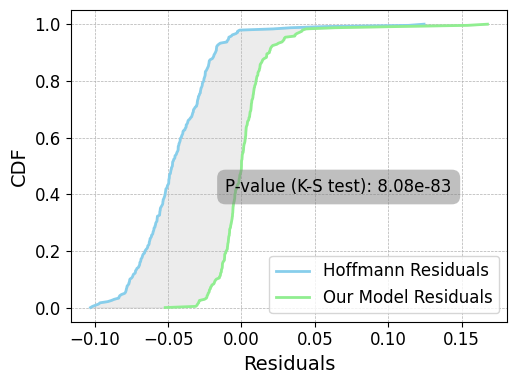

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

# Assuming 'residuals' and 'residuals_ours' are your residuals arrays from previous computations

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(residuals, residuals_ours)

# Plot combined CDFs
plt.figure(figsize=(8/1.5, 6/1.5))

# CDF for Hoffmann's residuals
sorted_residuals = np.sort(residuals)
yvals = np.arange(len(sorted_residuals)) / float(len(sorted_residuals) - 1)
plt.plot(sorted_residuals, yvals, color='skyblue', label='Hoffmann Residuals', linestyle='-', linewidth=2)

# CDF for Our Model's residuals
sorted_residuals_ours = np.sort(residuals_ours)
yvals_ours = np.arange(len(sorted_residuals_ours)) / float(len(sorted_residuals_ours) - 1)
plt.plot(sorted_residuals_ours, yvals_ours, color='lightgreen', label='Our Model Residuals', linestyle='-', linewidth=2)

# Find the min and max of both curves to define the range for fill_between
x_min = min(np.min(sorted_residuals), np.min(sorted_residuals_ours))
x_max = max(np.max(sorted_residuals), np.max(sorted_residuals_ours))

# Interpolate to find the y-values at common x-values for shading
common_x = np.linspace(x_min, x_max, 500)
interp_yvals = np.interp(common_x, sorted_residuals, yvals)
interp_yvals_ours = np.interp(common_x, sorted_residuals_ours, yvals_ours)

# Shade the area between the CDFs
plt.fill_between(common_x, interp_yvals, interp_yvals_ours, where=interp_yvals>=interp_yvals_ours, color='grey', alpha=0.15, interpolate=True)
plt.fill_between(common_x, interp_yvals, interp_yvals_ours, where=interp_yvals<=interp_yvals_ours, color='grey', alpha=0.15, interpolate=True)

plt.title('')
plt.xlabel('Residuals')
plt.ylabel('CDF')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best')

# Adjust figtext with rounded edges for the p-value annotation
plt.figtext(0.65, 0.5, f"P-value (K-S test): {p_value:.2e}", ha="center", fontsize=12,
            bbox=dict(facecolor='gray', alpha=0.5, pad=5, edgecolor='none', boxstyle="round,pad=0.5"))

plt.tight_layout()
plt.show()

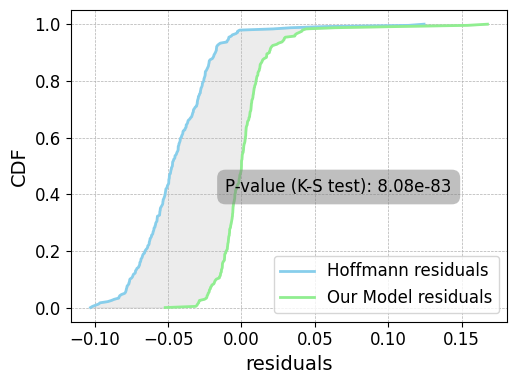

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Assuming 'residuals' and 'residuals_ours' are your residuals arrays from previous computations

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(residuals, residuals_ours)

# Plot combined CDFs
plt.figure(figsize=(8/1.5, 6/1.5))

# CDF for Hoffmann's residuals
sorted_residuals = np.sort(residuals)
yvals = np.arange(len(sorted_residuals)) / float(len(sorted_residuals) - 1)
plt.plot(sorted_residuals, yvals, color='skyblue', label='Hoffmann residuals', linestyle='-', linewidth=2)

# CDF for Our Model's residuals
sorted_residuals_ours = np.sort(residuals_ours)
yvals_ours = np.arange(len(sorted_residuals_ours)) / float(len(sorted_residuals_ours) - 1)
plt.plot(sorted_residuals_ours, yvals_ours, color='lightgreen', label='Our Model residuals', linestyle='-', linewidth=2)

# Find the min and max of both curves to define the range for fill_between
x_min = min(np.min(sorted_residuals), np.min(sorted_residuals_ours))
x_max = max(np.max(sorted_residuals), np.max(sorted_residuals_ours))

# Interpolate to find the y-values at common x-values for shading
common_x = np.linspace(x_min, x_max, 500)
interp_yvals = np.interp(common_x, sorted_residuals, yvals)
interp_yvals_ours = np.interp(common_x, sorted_residuals_ours, yvals_ours)

# Shade the area between the CDFs
plt.fill_between(common_x, interp_yvals, interp_yvals_ours, where=interp_yvals>=interp_yvals_ours, color='grey', alpha=0.15, interpolate=True)
plt.fill_between(common_x, interp_yvals, interp_yvals_ours, where=interp_yvals<=interp_yvals_ours, color='grey', alpha=0.15, interpolate=True)

plt.title('')
plt.xlabel('residuals')
plt.ylabel('CDF')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best')

# Adjust figtext with rounded edges for the p-value annotation
plt.figtext(0.65, 0.5, f"P-value (K-S test): {p_value:.2e}", ha="center", fontsize=12,
            bbox=dict(facecolor='gray', alpha=0.5, pad=5, edgecolor='none', boxstyle="round,pad=0.5"))

plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'residuals' and 'residuals_ours' are numpy arrays containing the residuals from Hoffmann's estimates and your model's estimates, respectively.

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(residuals, residuals_ours)

print(f"K-S statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Reject the null hypothesis - the distributions of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis - there is not enough evidence to conclude that the distributions of the two samples are significantly different.")

K-S statistic: 0.8250
P-value: 8.0817e-83
Reject the null hypothesis - the distributions of the two samples are significantly different.


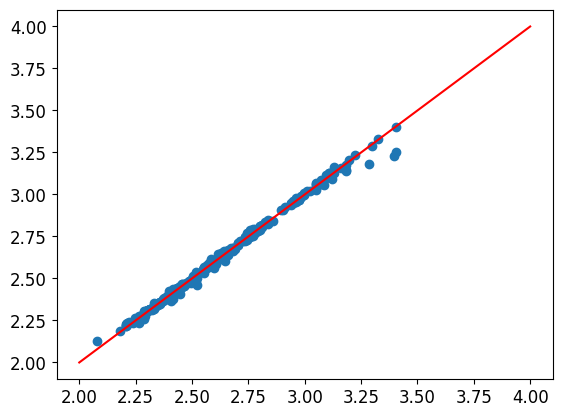

In [ ]:
plt.scatter(losses[indices], \
            np.exp(log_sum_exp(estimated_params[0], estimated_params[1], estimated_params[2], estimated_params[3], estimated_params[4], \
                               N[indices], D[indices])))
plt.plot([2, 4], [2, 4], color="red")

plt.show()

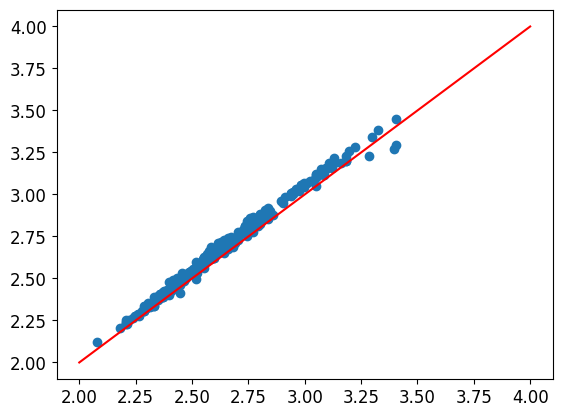

In [ ]:
plt.scatter(losses[indices], \
            np.exp(log_sum_exp(true_params[0], true_params[1], true_params[2], true_params[3], true_params[4], \
                               N[indices], D[indices])))
plt.plot([2, 4], [2, 4], color="red")

plt.show()

In [ ]:
a_low = 0.454
a_high = 0.455
a_mid = np.mean([a_low, a_high])

estimated_params_with_outliers = np.array([6.28204169, 9.51269708, 0.63748901, 0.35286066, 0.45596155])
#estimated_params = np.median(param_list, axis=0)
standard_errors = np.sqrt(np.diag(cov_matrix[:5, :5]))

parameter_labels = ["A", "B", "E", "alpha", "beta"]
print("Parameter estimates and their standard errors\n")
for index, label in enumerate(parameter_labels):
  print("%s: %.3f (%.3f)" % (label, estimated_params[index], standard_errors[index]))

Parameter estimates and their standard errors

A: 6.178 (0.258)
B: 7.643 (0.421)
E: 0.597 (0.014)
alpha: 0.348 (0.015)
beta: 0.366 (0.021)


In [ ]:
true_params

array([6.0073379 , 6.01786302, 0.52472853, 0.34      , 0.28      ])

In [ ]:
from scipy.stats import chi2

def chi_squared_stat(params_1, params_2, cov_matrix):
  return np.transpose(params_1 - params_2) @ np.linalg.inv(cov_matrix) @ (params_1 - params_2)

print("Difference between Hoffmann et al. (2022) params and our params:", true_params - estimated_params)
chi_squared = chi_squared_stat(true_params, estimated_params, cov_matrix[:5, :5])

print("Implied chi^2 (df=5) test statistic: %.2f" % (chi_squared))
print("Implied chi^2 (df=5) p-value: %.2e" % (chi2.sf(chi_squared, df=5)))

Difference between Hoffmann et al. (2022) params and our params: [-0.17061808 -1.62486934 -0.07238343 -0.00781303 -0.08585412]
Implied chi^2 (df=5) test statistic: 294.00
Implied chi^2 (df=5) p-value: 1.95e-61


## Why we use BFGS rather than L-BFGS

It's sometimes performs better

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Define the log-sum-exp function
def log_sum_exp(a, b, e, alpha, beta, N, D):
    return np.log(np.exp(a - alpha * np.log(N)) + np.exp(b - beta * np.log(D)) + np.exp(e))

# Define the Huber loss function
def custom_huber_loss(y_true, y_pred, delta=1e-3):
    # Calculate the difference
    diff = y_true - y_pred
    # Calculate the condition for Huber loss
    cond = np.abs(diff) <= delta
    # Apply Huber loss formula
    loss = np.where(cond, 0.5 * diff**2, delta * (np.abs(diff) - 0.5 * delta))
    return np.sum(loss)

# Define the objective function to be minimized
def objective(params, N, D, losses):
    a, b, e, alpha, beta = params
    predictions = log_sum_exp(a, b, e, alpha, beta, N, D)
    return custom_huber_loss(np.log(losses), predictions)

In [ ]:
true_params

array([6.0073379 , 6.01786302, 0.52472853, 0.34      , 0.28      ])

In [ ]:
from autograd import numpy as np
import pandas as pd
from autograd import numpy as anp
from autograd import grad
from scipy.optimize import minimize
from itertools import product

N = training_df['Model Size'].values
D = training_df['Training Tokens'].values
losses = training_df['loss'].values

num_bootstraps = 1000
results_df = pd.DataFrame()
temp_results = []
init_param = true_params
init_param =np.zeros(5)

for _ in range(num_bootstraps):
    # Generate a bootstrap sample from your dataset
    # This is a placeholder step; adapt it to your dataset's structure
    bootstrap_indices = np.random.choice(len(N), len(N), replace=True)

    # Data for the current bootstrap sample
    N_sample = N[bootstrap_indices]
    D_sample = D[bootstrap_indices]
    losses_sample = losses[bootstrap_indices]

    # Optimization with L-BFGS-B
    result_1 = minimize(objective, init_param, args=(N_sample, D_sample, losses_sample), method='L-BFGS-B')

    # Optimization with BFGS, including gradient
    result_2 = minimize(objective, init_param, args=(N_sample, D_sample, losses_sample), method='BFGS', jac=grad(objective))

    # Calculate residuals for each optimization method
    residuals_1 = losses - np.exp(log_sum_exp(*result_1.x, N, D))
    residuals_2 = losses - np.exp(log_sum_exp(*result_2.x, N, D))

    # Calculate RSS for each method by squaring and summing residuals
    MSE_1 = np.sum(residuals_1 ** 2)/num_bootstraps
    MSE_2 = np.sum(residuals_2 ** 2)/num_bootstraps

    # Calculate statistics of interest from result_1 and result_2
    # Adapt these calculations to your specific requirements
    temp_results.append({
        'L-BFGS-B MSE': MSE_1,
        'BFGS MSE': MSE_2
    })

# Convert results to a DataFrame for analysis
results_df = pd.concat([results_df, pd.DataFrame(temp_results)], ignore_index=True)

Mean of MSE Difference: -0.0009147881955370612


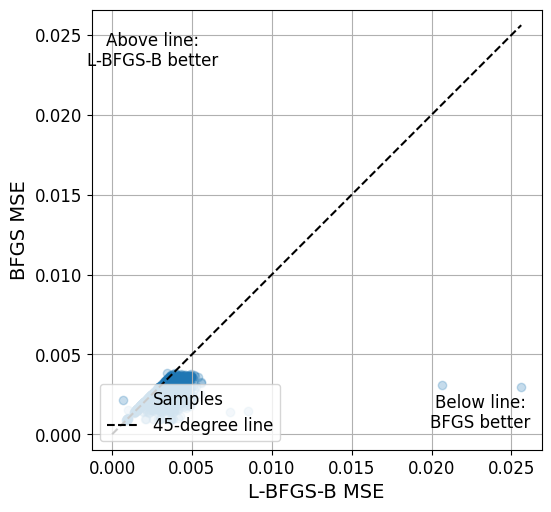

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming results_df contains 'L-BFGS-B MSE' and 'BFGS MSE' columns
# First, ensure these columns exist and contain the relevant data
# If not, you'll need to adjust the DataFrame creation logic above

# Calculate the MSE difference for annotation (not directly plotted)
results_df['MSE Difference'] = results_df['BFGS MSE'] - results_df['L-BFGS-B MSE']

# Calculate mean and median of the MSE Difference if needed
mean_MSE_difference = np.mean(results_df['MSE Difference'])
median_MSE_difference = np.median(results_df['MSE Difference'])
print(f"Mean of MSE Difference: {mean_MSE_difference}")

# Plotting
plt.figure(figsize=(6, 5))  # Square figure for 45-degree line reference

# Scatter plot of BFGS MSE vs L-BFGS-B MSE
plt.scatter(results_df['L-BFGS-B MSE'], results_df['BFGS MSE'], alpha=0.25, label='Samples')

# 45-degree line
max_MSE = max(results_df['L-BFGS-B MSE'].max(), results_df['BFGS MSE'].max())
plt.plot([0, max_MSE], [0, max_MSE], 'k--', label='45-degree line')

plt.title("")
plt.xlabel('L-BFGS-B MSE')
plt.ylabel('BFGS MSE')

# Annotations for which method performs better
plt.text(max_MSE*0.1, max_MSE*0.9, 'Above line:\nL-BFGS-B better', horizontalalignment='center')
plt.text(max_MSE*0.9, max_MSE*0.1, 'Below line:\nBFGS better', horizontalalignment='center', verticalalignment='top')

plt.legend(loc='lower left')
plt.axis('equal')  # Ensuring 1:1 aspect ratio
plt.grid(True)
plt.subplots_adjust(left=0.15, top=0.99)  # Increase the left margin to provide more space


# Saving the plot to a PDF
plt.savefig('optimizers.pdf')

plt.show()

# How much data is needed to get confidence bands around a and b that are as tight as Hoffmann et al. report

In [ ]:
from scipy.stats import norm

# Extract alpha and beta from the parameter list
alpha_samples = param_list[:, -2]
beta_samples = param_list[:, -1]

# Calculate the mean values of alpha and beta
mean_alpha = np.mean(alpha_samples)
mean_beta = np.mean(beta_samples)

# Extract the variances and covariance for alpha and beta
var_alpha = cov_matrix_untransformed[-2, -2]
var_beta = cov_matrix_untransformed[-1, -1]
cov_alpha_beta = cov_matrix_untransformed[-2, -1]

# Calculate the partial derivatives of g(alpha, beta) = alpha / (alpha + beta)
# with respect to alpha and beta, evaluated at the mean values of alpha and beta
partial_g_alpha = -mean_beta / (mean_alpha + mean_beta)**2
partial_g_beta = mean_alpha / (mean_alpha + mean_beta)**2

# Calculate the variance of the ratio using the delta method
var_ratio = (partial_g_alpha**2 * var_alpha +
             partial_g_beta**2 * var_beta +
             2 * partial_g_alpha * partial_g_beta * cov_alpha_beta)

# Calculate the standard error of the ratio
se_ratio = np.sqrt(var_ratio)

# Calculate the width of the 80% confidence interval
width_of_80_ci_band_a = 2 * norm.ppf(0.9) * se_ratio

# Assuming you want to maintain a fixed standard error (se_ratio) for a different sample size
# and you have a desired width for the confidence interval, calculate the required sample size
desired_width = 0.001

existing_sample_size = len(N[indices])
multiple_by_which_n_needs_to_increase = (width_of_80_ci_band_a / desired_width)**2
required_n = existing_sample_size*multiple_by_which_n_needs_to_increase

print(required_n)

Confirm with bootstrap

In [ ]:
a_low = 0.454
a_high = 0.455
a_mid = np.mean([a_low, a_high])

estimated_params_with_outliers = np.array([6.28204169, 9.51269708, 0.63748901, 0.35286066, 0.45596155])
#estimated_params = np.median(param_list, axis=0)
standard_errors = np.sqrt(np.diag(cov_matrix[:5, :5]))
standard_errors_untransformed = np.sqrt(np.diag(cov_matrix_untransformed[:5, :5]))

b = param_list[:, -2]/(param_list[:, -2] + param_list[:, -1])
a = 1-b

b_point_estimate = estimated_params[-2]/(estimated_params[-2] + estimated_params[-1])
a_point_estimate = 1 - b_point_estimate

parameter_labels = ["A", "B", "E", "alpha", "beta"]
print("Parameter estimates and their standard errors\n")
for index, label in enumerate(parameter_labels):
  print("%s: %.3f (%.3f)" % (label, estimated_params_untransformed[index], standard_errors_untransformed[index]))

print("a = beta/(alpha_beta): %.3f (%.3f)" % (a_point_estimate, np.std(a)))
chinchilla_conf_int_width = desired_width

a_std_err = np.std(a)
a_conf_int_width = np.percentile(a, 90) - np.percentile(a, 10)
chinchilla_a_conf_int_width = 1e-3
our_sample_size = len(N[indices])
required_sample_size = our_sample_size * (a_conf_int_width/chinchilla_a_conf_int_width)**2

print("""Our sample size is %d, and a has a standard error of %.3f
      and a 80%% conf int width of %.3f at this sample size""" % (our_sample_size, a_std_err, a_conf_int_width))

print("To reach 80%% conf int width of %.3f, we would need a sample size of %d" % (chinchilla_conf_int_width, required_sample_size))

### What if they used intermediate losses and clustered standard errors?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calculate_new_se(rho, se_original=0.02, G=500, N=500000): #suppose they have 1k loss values per training run
    """
    Calculate the new standard error using all observations and accounting for clustering.
    """
    n = N / G  # Number of observations per group
    effective_N = N / (1 + (n - 1) * rho)  # Effective number of independent observations
    new_se = se_original * math.sqrt(G / effective_N)
    return new_se

# Define rho values from 0.05 to 0.5
rho_values = np.linspace(0.25, 0.95, 100)
new_se_values = [calculate_new_se(rho) for rho in rho_values]
confidence_interval_width = [se * 1.282 * 2 for se in new_se_values]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(rho_values, confidence_interval_width, marker='o', linestyle='-', color='b')
plt.title('Standard Errors vs. Intra-group Correlation Coefficient (rho)')
plt.xlabel('Intra-group Correlation Coefficient (rho)')
plt.ylabel('80% CI interval width')
plt.grid(True)
plt.show()

# Comparing optimal scaling policies

In [ ]:
from scipy.stats import multivariate_normal

def scaling_law_reducible(N, D, params):
  a, b, e, alpha, beta = params
  A, B, E = np.exp([a, b, e])

  return A/N**alpha + B/D**beta

def G(params):
  a, b, e, alpha, beta = params
  A, B, E = np.exp([a, b, e])

  return ((alpha*A)/(beta*B))**(1/(alpha+beta))

def compute_optimal_allocation(compute, params):
  a, b, e, alpha, beta = params
  A, B, E = np.exp([a, b, e])

  G = ((alpha*A)/(beta*B))**(1/(alpha+beta))
  a = beta/(alpha+beta)
  b = 1 - a

  return G*(compute/6)**a, G**(-1) * (compute/6)**b

def compute_optimal_reducible_loss(compute, params):
  N_opt, D_opt = compute_optimal_allocation(compute, params)
  return scaling_law_reducible(N_opt, D_opt, params)

def optimal_compute_from_reducible_loss(loss, params):
  a, b, e, alpha, beta = params
  A, B, E = np.exp([a, b, e])

  G = ((alpha*A)/(beta*B))**(1/(alpha+beta))
  a = beta/(alpha+beta)
  b = 1 - a

  return 6 * (loss/(G**(-alpha) * A + G**beta * B))**(-(alpha + beta)/(alpha*beta))

def compute_optimal_allocation_from_shares(compute, G, a):
  b = 1-a
  return G*(compute/6)**a, G**(-1) * (compute/6)**b

def ratio(params_and_tokens):
  params, tokens = params_and_tokens
  return tokens/params

In [ ]:
compute_thresholds = 10**np.arange(18, 28, 0.05)
conf_int_percentile = 80
low, high = (100-conf_int_percentile)/2, 100 - (100-conf_int_percentile)/2

D_N_ratio_conf_int = [[], [], []]
D_N_ratios = []
chinchilla_D_N_ratio = []

compute_loss_factors = []

simulated_params_list = multivariate_normal.rvs(mean=estimated_params, cov=cov_matrix[:5, :5], size=10000)

for threshold in compute_thresholds:
  D_N_ratio = []
  compute_loss_factor = []

  N_true_opt, D_true_opt = compute_optimal_allocation_from_shares(threshold, G(true_params), a_mid)
  D_N_true_ratio = D_true_opt/N_true_opt

  for simulated_params in simulated_params_list:
    N_opt, D_opt = compute_optimal_allocation(threshold, simulated_params)
    D_N_ratio.append(D_opt/N_opt)

    loss_achieved_by_chinchilla = scaling_law_reducible(N_true_opt, D_true_opt, simulated_params)
    compute_needed_for_loss = optimal_compute_from_reducible_loss(loss_achieved_by_chinchilla, simulated_params)

    compute_loss_factor.append(threshold/compute_needed_for_loss)

  D_N_ratio_conf_int[0].append(np.percentile(D_N_ratio, low))
  D_N_ratio_conf_int[1].append(np.median(D_N_ratio))
  D_N_ratio_conf_int[2].append(np.percentile(D_N_ratio, high))

  chinchilla_D_N_ratio.append(D_N_true_ratio)

  D_N_ratios.append(D_N_ratio)
  compute_loss_factors.append(compute_loss_factor)

D_N_ratios = np.array(D_N_ratios)
compute_loss_factors = np.array(compute_loss_factors)

In [ ]:
def log_format(val, pos):
    """Format the tick labels on logarithmic scale."""
    val_str = '{:g}'.format(val)
    if float(val_str) >= 1.0:
        # If the value is a whole number, return it as an integer.
        return str(int(val))
    else:
        # Otherwise, return the string as is (useful for fractional values).
        return val_str

In [ ]:
# Assuming your previous variables and data (compute_thresholds, D_N_ratio_conf_int, etc.) are defined
chinchilla_lower = ratio(compute_optimal_allocation_from_shares(compute_thresholds, G(true_params), a_low))
chinchilla_upper = ratio(compute_optimal_allocation_from_shares(compute_thresholds, G(true_params), a_high))

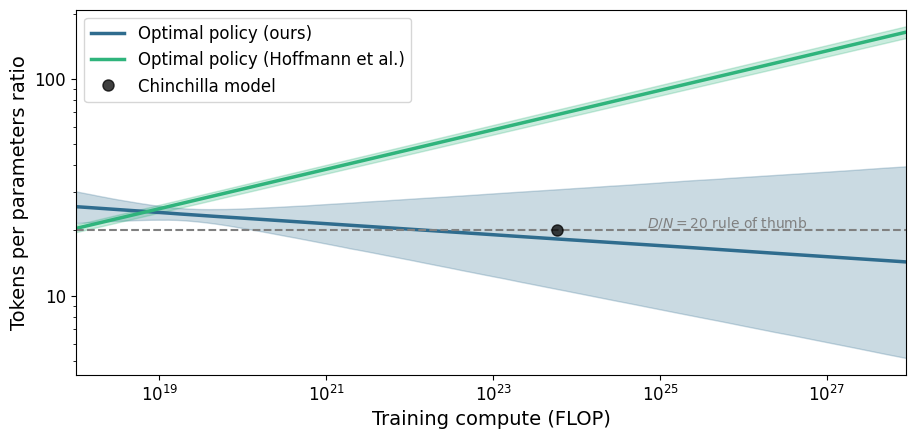

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

chinchilla_compute = (1.4*10**12)*(70*10**9)*6

color_ours = 0.35
color_chinchilla = 0.65

# Define line width for better visibility
line_width = 2.5

plt.figure(figsize=(15/1.4, 7/1.4))  # Width: 10 inches, Height: 6 inches

plt.plot(compute_thresholds, D_N_ratio_conf_int[1], label="Optimal policy (ours)", color=plt.cm.viridis(color_ours), linewidth=line_width)
#plt.plot(compute_thresholds, D_N_ratio_conf_int[0], color=plt.cm.viridis(color_ours), linestyle="dashed")
#plt.plot(compute_thresholds, D_N_ratio_conf_int[2], color=plt.cm.viridis(color_ours), linestyle="dashed")

plt.plot(compute_thresholds, chinchilla_D_N_ratio, \
         label="Optimal policy (Hoffmann et al.)", color=plt.cm.viridis(color_chinchilla), linewidth=line_width)
# Assuming chinchilla_lower and chinchilla_upper are defined previously along with their respective function calculations
#plt.plot(compute_thresholds, chinchilla_lower, label="", color=plt.cm.viridis(color_chinchilla), linestyle="dashed")
#plt.plot(compute_thresholds, chinchilla_upper, label="", color=plt.cm.viridis(color_chinchilla), linestyle="dashed")

plt.fill_between(compute_thresholds, D_N_ratio_conf_int[0], D_N_ratio_conf_int[2], color=plt.cm.viridis(color_ours), alpha=0.25, label='')
plt.fill_between(compute_thresholds, chinchilla_lower, chinchilla_upper, color=plt.cm.viridis(color_chinchilla), alpha=0.25, label='')

plt.axhline(y=20, color='gray', linestyle='--')
plt.text(x=7e24, y=20, s=r"$D/N = 20$ rule of thumb", color='gray', fontsize = 10, verticalalignment='bottom')

# Adding the round filled marker at (chinchilla_compute, 20)
plt.plot(chinchilla_compute, 20, 'o', color='black', markersize=8, label="Chinchilla model", alpha=0.75)  # 'o' is the marker style for a filled circle

plt.xscale("log")
plt.yscale("log")
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_format))

plt.xlim([min(compute_thresholds), max(compute_thresholds)])
plt.subplots_adjust(bottom=0.15)  # Adjust bottom margin to make space for the x-axis

plt.xlabel("Training compute (FLOP)")
plt.ylabel("Tokens per parameters ratio")
plt.legend(loc='upper left')

plt.savefig("tokens_to_params_ratio_plot.pdf")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming your previous variables and data (compute_thresholds, D_N_ratio_conf_int, etc.) are defined

chinchilla_lower = ratio(compute_optimal_allocation_from_shares(compute_thresholds, G(true_params), a_low))
chinchilla_upper = ratio(compute_optimal_allocation_from_shares(compute_thresholds, G(true_params), a_high))
chinchilla_compute = (1.4*10**12)*(70*10**9)*6

color_ours = 0.35
color_chinchilla = 0.65

plt.figure(figsize=(10/1.5, 6/1.5)) # Width: 10 inches, Height: 6 inches
plt.plot(compute_thresholds, D_N_ratio_conf_int[1], label="Point estimate (ours)", color=plt.cm.viridis(color_ours))
plt.plot(compute_thresholds, D_N_ratio_conf_int[0], color=plt.cm.viridis(color_ours), linestyle="dotted")
plt.plot(compute_thresholds, D_N_ratio_conf_int[2], color=plt.cm.viridis(color_ours), linestyle="dotted")
plt.plot(compute_thresholds, chinchilla_D_N_ratio, label="Point estimate (Hoffmann et al.)", color=plt.cm.viridis(color_chinchilla))

# Assuming chinchilla_lower and chinchilla_upper are defined previously along with their respective function calculations
plt.plot(compute_thresholds, chinchilla_lower, label="", color=plt.cm.viridis(color_chinchilla), linestyle="dashed")
plt.plot(compute_thresholds, chinchilla_upper, label="", color=plt.cm.viridis(color_chinchilla), linestyle="dashed")

plt.fill_between(compute_thresholds, D_N_ratio_conf_int[0], D_N_ratio_conf_int[2], color=plt.cm.viridis(color_ours), alpha=0.2, label='10th to 90th percentile CI (ours)')
plt.fill_between(compute_thresholds, chinchilla_lower, chinchilla_upper, color=plt.cm.viridis(color_chinchilla), alpha=0.35, label='80th percentile CI (Hoffmann et al.)')

plt.axhline(y=20, color='gray', linestyle='--')
plt.text(x=7e24, y=20, s=r"$D/N = 20$ rule of thumb", color='gray', fontsize=10, verticalalignment='bottom')

# Adding the vertical dashed line at chinchilla_compute
plt.axvline(x=chinchilla_compute, color='black', linestyle='--')

# Adding the round filled marker at (chinchilla_compute, 20) and increasing its size
plt.plot(chinchilla_compute, 20, 'o', color='black', markersize=10, label='Chinchilla')

plt.xscale("log")
plt.yscale("log")
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_format))
plt.xlim([min(compute_thresholds)*0.8, max(compute_thresholds)*1.2])  # Extend x-axis range
plt.xticks([10**19, 10**20, 10**21, 10**22, 10**23, 10**24, 10**25, 10**26, 10**27])  # Add more tick marks
plt.subplots_adjust(bottom=0.15) # Adjust bottom margin to make space for the x-axis

plt.xlabel("Training compute (FLOPs)")
plt.ylabel("Optimal ratio of training tokens to model parameters")
plt.title("Comparison of optimal token-to-parameter ratios from different estimates")
plt.legend(loc='upper left')

plt.show()

TypeError: loop of ufunc does not support argument 0 of type int which has no callable log10 method

Error in callback <function _draw_all_if_interactive at 0x79167bdad120> (for post_execute):


TypeError: loop of ufunc does not support argument 0 of type int which has no callable log10 method

TypeError: loop of ufunc does not support argument 0 of type int which has no callable log10 method

<Figure size 666.667x400 with 1 Axes>

In [ ]:
import numpy as np

# Assuming compute_thresholds and chinchilla_D_N_ratio are numpy arrays or can be converted into numpy arrays
compute_thresholds = np.array(compute_thresholds)  # Convert to numpy array if not already
chinchilla_D_N_ratio = np.array(chinchilla_D_N_ratio)  # Convert to numpy array if not already

# Calculate the absolute difference between each element in compute_thresholds and chinchilla_compute
abs_difference = np.abs(compute_thresholds - chinchilla_compute)

# Find the index of the smallest difference
index_closest = np.argmin(abs_difference)

# Retrieve and print the value of chinchilla_D_N_ratio at this index
value_closest = chinchilla_D_N_ratio[index_closest]
print(f"The value of chinchilla_D_N_ratio closest to chinchilla_compute is: {value_closest}")

In [ ]:
import numpy as np

# Assuming compute_thresholds and chinchilla_D_N_ratio are numpy arrays or can be converted into numpy arrays
compute_thresholds = np.array(D_N_ratio_conf_int[1])  # Convert to numpy array if not already
chinchilla_D_N_ratio = np.array(D_N_ratio_conf_int[1])  # Convert to numpy array if not already

# Calculate the absolute difference between each element in compute_thresholds and chinchilla_compute
abs_difference = np.abs(compute_thresholds - chinchilla_compute)

# Find the index of the smallest difference
index_closest = np.argmin(abs_difference)

# Retrieve and print the value of chinchilla_D_N_ratio at this index
value_closest = chinchilla_D_N_ratio[index_closest]
print(f"The value of chinchilla_D_N_ratio closest to chinchilla_compute is: {value_closest}")